# LandClass Principal Component Analysis
The objective of this study is to reduce the dimensions of landclass using PCA. <br>
The new components created will be explained using loading values. <br>
Please note: Each component makes up a mixture of the original features.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm

In [2]:
# reading in landclass
land = pd.read_csv('LandClass.csv')
print(land.shape)
land.columns

(7, 15)


Index(['Region', 'Shrubs', 'Herbaceous vegetation',
       'Cultivated and managed vegetation/agriculture (cropland)',
       'Urban / built up', 'Bare / sparse vegetation',
       'Permanent water bodies', 'Herbaceous wetland',
       'Closed forest, evergreen, broad leaf',
       'Closed forest, deciduous broad leaf', 'Closed forest, unknown',
       'Open forest, evergreen broad leaf',
       'Open forest, deciduous broad leaf', 'Open forest, unknown definitions',
       'Open sea'],
      dtype='object')

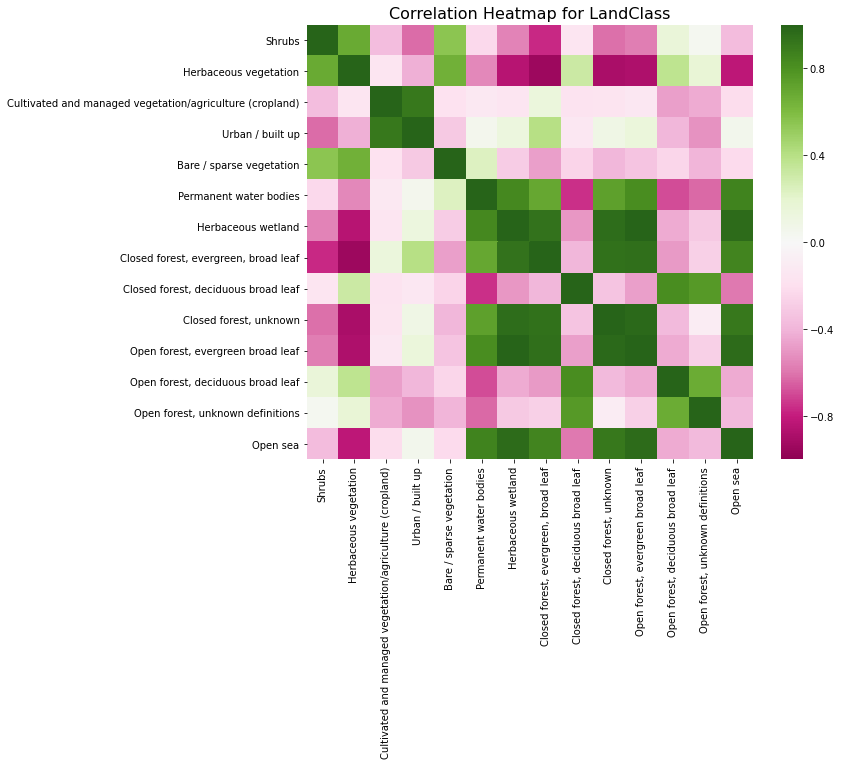

In [3]:
fig, ax = plt.subplots(figsize=(10,8))
ax = sns.heatmap(land.drop(columns='Region').corr(), cmap = 'PiYG', vmin= -1, vmax= 1)
ax.set_title('Correlation Heatmap for LandClass', fontsize= 16);

In [4]:
# creating separate dataframes with just continuous variables
_land = land.drop(columns='Region')

In [5]:
# Scaling before PCA
scaler = StandardScaler()
_land_scaled = scaler.fit_transform(_land)
_land_scaled_df = pd.DataFrame(data=_land_scaled,
                              columns = _land.columns)
_land_scaled_df

,Shrubs,Herbaceous vegetation,Cultivated and managed vegetation/agriculture (cropland),Urban / built up,Bare / sparse vegetation,Permanent water bodies,Herbaceous wetland,"Closed forest, evergreen, broad leaf","Closed forest, deciduous broad leaf","Closed forest, unknown","Open forest, evergreen broad leaf","Open forest, deciduous broad leaf","Open forest, unknown definitions",Open sea
0,-0.629009,0.157978,0.749442,0.176090,-5.775201e-01,-0.708213,-0.400047,0.054122,0.402759,-0.133897,-0.359134,-0.423018,1.007383,-0.873126
1,0.464862,0.727004,-0.925672,-0.748383,-4.491823e-01,-0.868132,-0.400047,-0.756866,0.619630,-0.758747,-0.523983,1.701270,0.540384,-0.428625
2,-0.325666,0.340496,-0.730891,-0.440225,1.424836e-16,-0.868132,-0.615457,-0.502322,1.969045,-0.133897,-0.523983,1.357950,1.334282,-0.650876
3,1.016394,1.360449,-0.185505,-0.440225,2.374249e+00,0.890978,-0.400047,-0.798303,-0.922560,-0.758747,-0.523983,-0.916540,-1.327611,-0.317500
4,-1.134580,-1.967819,-0.782833,-0.132068,-6.416889e-01,2.010411,2.400284,2.149668,-1.091237,2.365506,2.402079,-0.895082,-0.440313,2.349502
5,1.678232,0.147241,-0.211476,-0.748383,-6.416889e-02,-0.388375,-0.615457,-0.745026,-0.657496,-0.446322,-0.523983,-0.186986,0.260185,-0.095250
6,-1.070234,-0.765348,2.086936,2.333195,-6.416889e-01,-0.068537,0.030773,0.598727,-0.320142,-0.133897,0.052987,-0.637593,-1.374311,0.015875


# PCA

In [6]:
# Return components that can explain at least 95% of the variance
pca = PCA(n_components=.95)
pca.fit(_land_scaled_df)

PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [7]:
# Explained variance ratio is 
pca.explained_variance_ratio_

array([0.53802327, 0.20561954, 0.1832267 , 0.0404178 ])

Text(0, 0.5, 'Variance Explained')

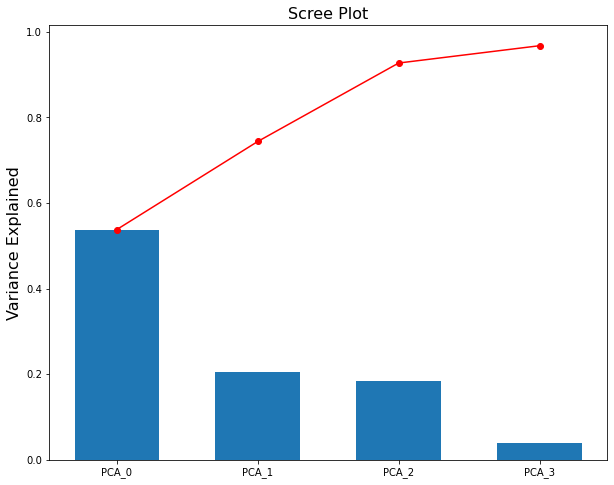

In [8]:
index = ['PCA_0', 'PCA_1', 'PCA_2', 'PCA_3']
fig, ax = plt.subplots(figsize=(10,8))
ax.bar(index, pca.explained_variance_ratio_, width = 0.6)
ax.plot(np.cumsum(pca.explained_variance_ratio_), color='r', marker='o' )
ax.set_title('Scree Plot', fontsize=16)
ax.set_ylabel('Variance Explained', fontsize= 16)

In [9]:
_prin_comp = pca.transform(_land_scaled_df)
pca_df = pd.DataFrame(data = _prin_comp,
            columns = ['PCA_{}'.format(i) for i in range(_prin_comp.shape[1])])
pca_df['Region'] = land['Region']
pca_df

,PCA_0,PCA_1,PCA_2,PCA_3,Region
0,-0.751245,-0.809205,1.247674,0.184205,NSW
1,-2.279377,-1.210268,-0.837637,0.153656,NT
2,-2.169377,-2.162310,-0.314509,-0.935864,QL
3,-1.087119,3.416267,-1.080634,-0.839279,SA
4,6.067233,-0.741262,-1.527103,-0.059877,TA
5,-1.346567,0.757438,-0.858555,1.522803,WA
6,1.566453,0.749339,3.370763,-0.025644,VI


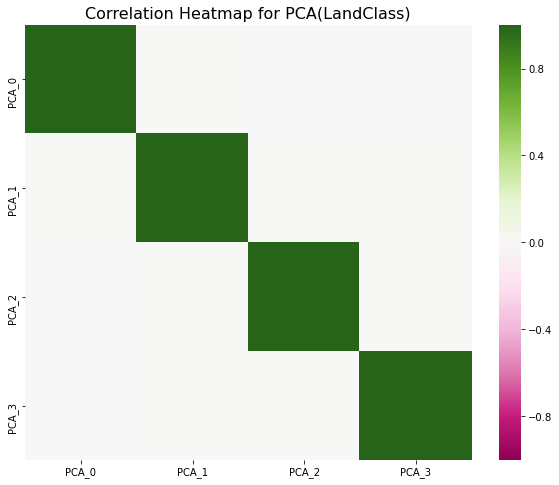

In [10]:
fig, ax = plt.subplots(figsize=(10,8))
ax = sns.heatmap(pca_df.drop(columns='Region').corr(), cmap = 'PiYG', vmin=-1, vmax=1)
ax.set_title('Correlation Heatmap for PCA(LandClass)', fontsize= 16);

In [11]:
eig_values = pca.explained_variance_
eig_vectors = pca.components_
print(eig_values)
print(eig_vectors)

[8.78771343 3.3584525  2.99270276 0.66015737]
[[-0.22390326 -0.32867478  0.04055682  0.13026626 -0.11257044  0.30418977
   0.34939865  0.35325343 -0.21280697  0.33548192  0.35149552 -0.22165807
  -0.16338065  0.33755826]
 [ 0.26962133  0.19356048  0.17093513  0.07397382  0.45002096  0.23368809
  -0.07197384 -0.12297101 -0.41756551 -0.17209185 -0.09280204 -0.38410809
  -0.46629408 -0.01259649]
 [-0.30551254 -0.09413212  0.58767229  0.56635596 -0.22487829 -0.21240055
  -0.14321012  0.06110494  0.08425822 -0.13087265 -0.12908573 -0.11200762
  -0.13166459 -0.20244689]
 [ 0.51964908 -0.24185419  0.12795977 -0.12437906 -0.55817443 -0.22954477
  -0.0770413  -0.06180891 -0.4611932  -0.04973754 -0.04030203 -0.13454713
   0.14944548  0.09158718]]


In [12]:
pc0 = pca.components_[0]
pc1 = pca.components_[1]
pc2 = pca.components_[2]
pc3 = pca.components_[3]

# loading_0

In [13]:
# marshland with little shrubs and vegetation
# wooded marshland
structure_loading_0 = pc0 * np.sqrt(eig_values[0])
str_loading_0 = pd.Series(structure_loading_0, index=_land_scaled_df.columns)
str_loading_0.sort_values(ascending=False)

Closed forest, evergreen, broad leaf                        1.047187
Open forest, evergreen broad leaf                           1.041976
Herbaceous wetland                                          1.035760
Open sea                                                    1.000660
Closed forest, unknown                                      0.994505
Permanent water bodies                                      0.901743
Urban / built up                                            0.386162
Cultivated and managed vegetation/agriculture (cropland)    0.120227
Bare / sparse vegetation                                   -0.333705
Open forest, unknown definitions                           -0.484327
Closed forest, deciduous broad leaf                        -0.630847
Open forest, deciduous broad leaf                          -0.657085
Shrubs                                                     -0.663741
Herbaceous vegetation                                      -0.974326
dtype: float64

__PCA_0 can be described as "wooded marshlands"__

# loading_1

In [14]:
# outback-like regions with water bodies
structure_loading_1 = pc1 * np.sqrt(eig_values[1])
str_loading_1 = pd.Series(structure_loading_1, index=_land_scaled_df.columns)
str_loading_1.sort_values(ascending=False)

Bare / sparse vegetation                                    0.824712
Shrubs                                                      0.494110
Permanent water bodies                                      0.428259
Herbaceous vegetation                                       0.354721
Cultivated and managed vegetation/agriculture (cropland)    0.313257
Urban / built up                                            0.135565
Open sea                                                   -0.023084
Herbaceous wetland                                         -0.131900
Open forest, evergreen broad leaf                          -0.170070
Closed forest, evergreen, broad leaf                       -0.225358
Closed forest, unknown                                     -0.315377
Open forest, deciduous broad leaf                          -0.703920
Closed forest, deciduous broad leaf                        -0.765234
Open forest, unknown definitions                           -0.854534
dtype: float64

__PCA_1 can be described as "outback-like regions with some bodies of water"__

# loading_2

In [15]:
# Human Civilized Regions
structure_loading_2 = pc2 * np.sqrt(eig_values[2])
str_loading_2 = pd.Series(structure_loading_2, index=_land_scaled_df.columns)
str_loading_2.sort_values(ascending=False)

Cultivated and managed vegetation/agriculture (cropland)    1.016640
Urban / built up                                            0.979764
Closed forest, deciduous broad leaf                         0.145762
Closed forest, evergreen, broad leaf                        0.105708
Herbaceous vegetation                                      -0.162843
Open forest, deciduous broad leaf                          -0.193767
Open forest, evergreen broad leaf                          -0.223311
Closed forest, unknown                                     -0.226402
Open forest, unknown definitions                           -0.227772
Herbaceous wetland                                         -0.247745
Open sea                                                   -0.350222
Permanent water bodies                                     -0.367441
Bare / sparse vegetation                                   -0.389027
Shrubs                                                     -0.528519
dtype: float64

__PCA_2 can be described as "Human Civilized Regions"__

# loading_3

In [16]:
# Park-like plains
structure_loading_3 = pc3 * np.sqrt(eig_values[3])
str_loading_3 = pd.Series(structure_loading_3, index=_land_scaled_df.columns)
str_loading_3.sort_values(ascending=False)

Shrubs                                                      0.422215
Open forest, unknown definitions                            0.121425
Cultivated and managed vegetation/agriculture (cropland)    0.103967
Open sea                                                    0.074415
Open forest, evergreen broad leaf                          -0.032745
Closed forest, unknown                                     -0.040412
Closed forest, evergreen, broad leaf                       -0.050220
Herbaceous wetland                                         -0.062596
Urban / built up                                           -0.101058
Open forest, deciduous broad leaf                          -0.109320
Permanent water bodies                                     -0.186505
Herbaceous vegetation                                      -0.196507
Closed forest, deciduous broad leaf                        -0.374720
Bare / sparse vegetation                                   -0.453517
dtype: float64

__PCA_3 can be described as "Park-like Plains"__

---

# Ordinary Least Squares
Fitting OLS model for 2015 to examine coefficients

In [17]:
wildfires = pd.read_csv('Historical_wildfires.csv')
wildfires['Date'] = pd.to_datetime(wildfires['Date'])
wildfires = pd.pivot(wildfires, index = 'Date', columns = 'Region', values = 'Estimated_fire_area')
wildfires.fillna(0, inplace = True)
wildfires.reset_index(inplace=True)

In [18]:
# creating melted dataframe
_melt = pd.melt(wildfires, id_vars=['Date'])
_melt = _melt.loc[(_melt['Date'] >= '2015') & (_melt['Date'] < '2016')]
_melt.head()

,Date,Region,value
3652,2015-01-01,NSW,0.0
3653,2015-01-02,NSW,0.0
3654,2015-01-03,NSW,8.1
3655,2015-01-04,NSW,3.0
3656,2015-01-05,NSW,1.0


In [19]:
# need area values from weather data

In [20]:
weather = pd.read_csv('HistoricalWeather.csv')
weather.columns = ['Date', 'Region', 'Parameter', 'count', 'min', 'max', 'mean', 'variance']
weather.groupby('Region')['count'].mean()

Region
NSW    8.002343e+05
NT     1.357561e+06
QL     1.730605e+06
SA     9.913151e+05
TA     6.778526e+04
VI     2.294532e+05
WA     2.528546e+06
Name: count, dtype: float64

In [21]:
_pca_df = pca_df.set_index('Region').copy(deep=True)
_pca_df['count'] = weather.groupby('Region')['count'].mean()
_pca_df

,PCA_0,PCA_1,PCA_2,PCA_3,count
Region,,,,,
NSW,-0.751245,-0.809205,1.247674,0.184205,8.002343e+05
NT,-2.279377,-1.210268,-0.837637,0.153656,1.357561e+06
QL,-2.169377,-2.162310,-0.314509,-0.935864,1.730605e+06
SA,-1.087119,3.416267,-1.080634,-0.839279,9.913151e+05
TA,6.067233,-0.741262,-1.527103,-0.059877,6.778526e+04
WA,-1.346567,0.757438,-0.858555,1.522803,2.528546e+06
VI,1.566453,0.749339,3.370763,-0.025644,2.294532e+05


In [22]:
_final = pd.merge(_melt, _pca_df.reset_index(), how='inner')
_final['fire_per_10k'] = _final['value'] / (_final['count'] / 10000)
_final['intercept'] = 1
_final

,Date,Region,value,PCA_0,PCA_1,PCA_2,PCA_3,count,fire_per_10k,intercept
0,2015-01-01,NSW,0.000000,-0.751245,-0.809205,1.247674,0.184205,8.002343e+05,0.000000,1
1,2015-01-02,NSW,0.000000,-0.751245,-0.809205,1.247674,0.184205,8.002343e+05,0.000000,1
2,2015-01-03,NSW,8.100000,-0.751245,-0.809205,1.247674,0.184205,8.002343e+05,0.101220,1
3,2015-01-04,NSW,3.000000,-0.751245,-0.809205,1.247674,0.184205,8.002343e+05,0.037489,1
4,2015-01-05,NSW,1.000000,-0.751245,-0.809205,1.247674,0.184205,8.002343e+05,0.012496,1
...,...,...,...,...,...,...,...,...,...,...
2550,2015-12-27,WA,93.974146,-1.346567,0.757438,-0.858555,1.522803,2.528546e+06,0.371653,1
2551,2015-12-28,WA,113.844000,-1.346567,0.757438,-0.858555,1.522803,2.528546e+06,0.450235,1
2552,2015-12-29,WA,137.379221,-1.346567,0.757438,-0.858555,1.522803,2.528546e+06,0.543313,1
2553,2015-12-30,WA,64.653333,-1.346567,0.757438,-0.858555,1.522803,2.528546e+06,0.255694,1


In [23]:
X = _final[['PCA_0', 'PCA_1', 'PCA_2', 'PCA_3', 'intercept']]
y = _final['value']
model = sm.OLS(y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  value   R-squared:                       0.249
Model:                            OLS   Adj. R-squared:                  0.248
Method:                 Least Squares   F-statistic:                     211.7
Date:                Thu, 03 Dec 2020   Prob (F-statistic):          5.58e-157
Time:                        12:40:03   Log-Likelihood:                -16483.
No. Observations:                2555   AIC:                         3.298e+04
Df Residuals:                    2550   BIC:                         3.301e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
PCA_0        -20.2001      1.106    -18.261      0.000     -22.369     -18.031
PCA_1        -16.9174      1.789     -9.454      0.000     -20.426     -13.409
PCA_2        -21.0470      1.896    -11.103      0.000     -24.764     -17.330
PCA_3         69.9698      4.036     17.337      0.000      62.056      77.884
intercept     84.7142      3.036     27.904      0.000      78.761      90.667
==============================================================================
Omnibus:                     1975.532   Durbin-Watson:                   0.484
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            50082.933
Skew:                           3.469   Prob(JB):                         0.00
Kurtosis:                      23.550   Cond. No.                         3.65
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

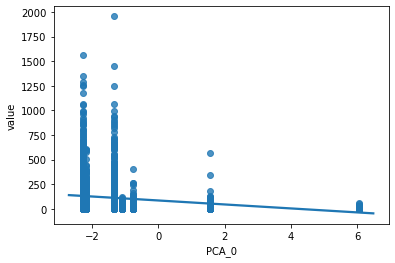

In [24]:
sns.regplot(x = _final['PCA_0'], y = _final['value'])

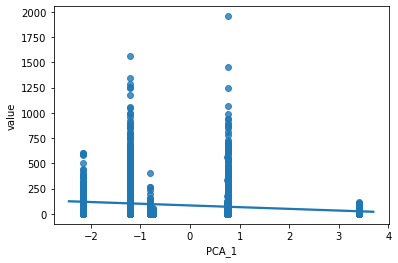

In [25]:
sns.regplot(x = _final['PCA_1'], y = _final['value'])

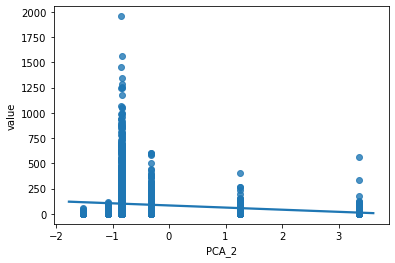

In [26]:
sns.regplot(x = _final['PCA_2'], y = _final['value'])

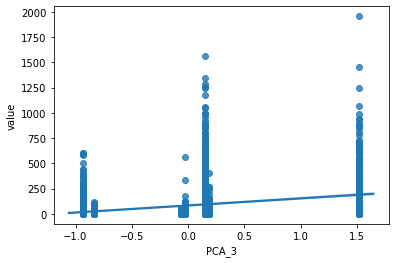

In [27]:
sns.regplot(x = _final['PCA_3'], y = _final['value'])

In [28]:
pca_df

,PCA_0,PCA_1,PCA_2,PCA_3,Region
0,-0.751245,-0.809205,1.247674,0.184205,NSW
1,-2.279377,-1.210268,-0.837637,0.153656,NT
2,-2.169377,-2.162310,-0.314509,-0.935864,QL
3,-1.087119,3.416267,-1.080634,-0.839279,SA
4,6.067233,-0.741262,-1.527103,-0.059877,TA
5,-1.346567,0.757438,-0.858555,1.522803,WA
6,1.566453,0.749339,3.370763,-0.025644,VI
